<a href="https://colab.research.google.com/github/UpstageAI/cookbook/blob/main/Solar-Fullstack-LLM-101/81_gradio_stream.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 81. Gradio_Stream

## Overview
This exercise demonstrates how to build a Retrieval-Augmented Generation (RAG) system using Gradio and how to generate and stream responses in real-time using its streaming features. Through this exercise, you will learn to handle real-time interactions with users via a web-based interface. This process helps manage the overall conversation flow, thereby providing more detailed and meaningful responses.


## Purpose of the Exercise
The purpose of this exercise is to implement real-time response generation and streaming capabilities using Gradio to develop a live interactive chatbot interface. By the end of this tutorial, users will be able to create a dynamic chat system that streams responses as they are generated, enhancing user engagement and interaction.

In [4]:
!pip install -qU gradio python-dotenv langchain-upstage python-dotenv langchain

In [2]:
# @title set API key
from pprint import pprint
import os

import warnings

warnings.filterwarnings("ignore")

if "google.colab" in str(get_ipython()):
    # Running in Google Colab. Please set the UPSTAGE_API_KEY in the Colab Secrets
    from google.colab import userdata

    os.environ["UPSTAGE_API_KEY"] = userdata.get("UPSTAGE_API_KEY")
else:
    # Running locally. Please set the UPSTAGE_API_KEY in the .env file
    from dotenv import load_dotenv

    load_dotenv()

assert (
    "UPSTAGE_API_KEY" in os.environ
), "Please set the UPSTAGE_API_KEY environment variable"

In [6]:
import gradio as gr

from langchain_upstage import ChatUpstage
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder
from langchain_core.output_parsers import StrOutputParser
from langchain.schema import AIMessage, HumanMessage


llm = ChatUpstage(model="solar-pro", streaming=True)

In [7]:
# More general chat
chat_with_history_prompt = ChatPromptTemplate.from_messages(
    [
        ("system", "You are a helpful assistant."),
        MessagesPlaceholder(variable_name="history"),
        ("human", "{message}"),
    ]
)

In [8]:
chain = chat_with_history_prompt | llm | StrOutputParser()

In [9]:
def chat(message, history):
    history_langchain_format = []
    for human, ai in history:
        history_langchain_format.append(HumanMessage(content=human))
        history_langchain_format.append(AIMessage(content=ai))

    generator = chain.stream({"message": message, "history": history_langchain_format})

    assistant = ""
    for gen in generator:
        assistant += gen
        yield assistant

In [13]:
with gr.Blocks() as demo:
    chatbot = gr.ChatInterface(
        chat,
        examples=[
            "How to eat healthy?",
            "Best Places in Korea",
            "How to make a chatbot?",
        ],
        title="Solar Chatbot",
        description="Upstage Solar Chatbot",
    )
    chatbot.chatbot.height = 600

In [14]:
if __name__ == "__main__":
    demo.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://a034c11ee66c3ab813.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


# Example
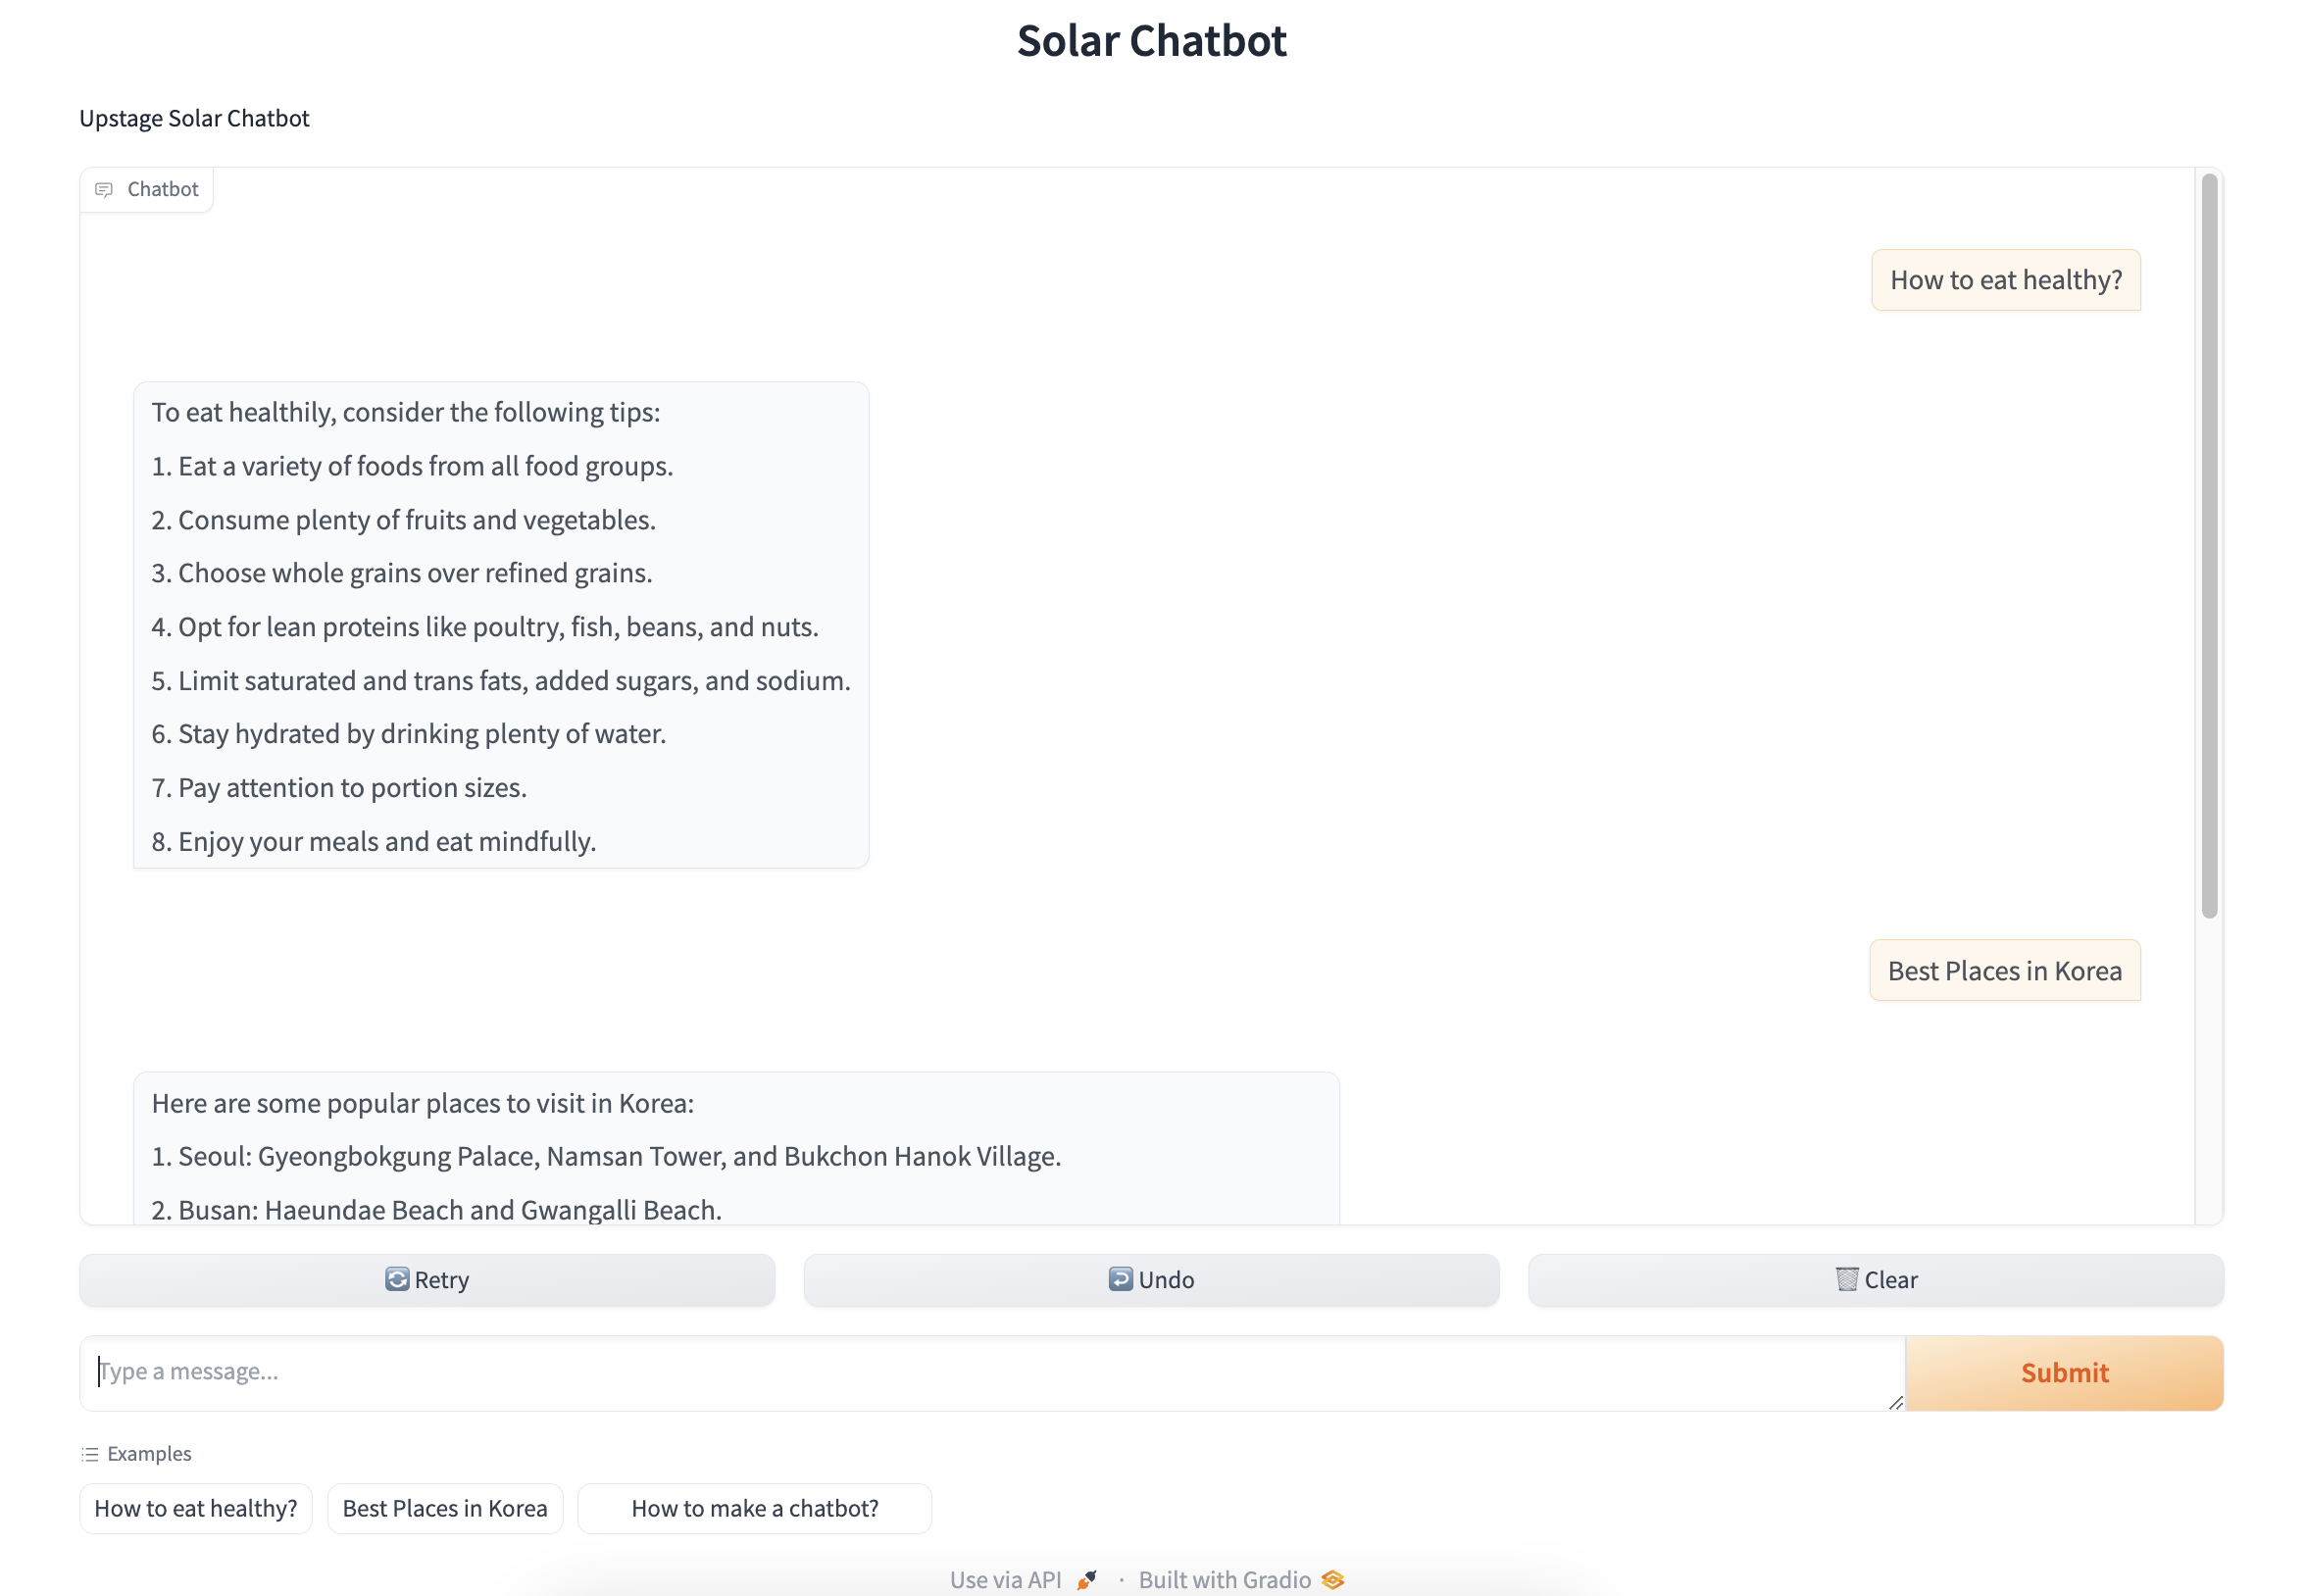